# INFERENCIA CON MODELO XGBOOST

In [1]:
# Carga de librerias
import pandas as pd
from xgboost import XGBClassifier
import pickle
from cleaning_data.DataPipeline import PipelineCV
import shap
import matplotlib.pyplot as plt
import matplotlib
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
new_data_path = "FICO_Dataset.csv"
sep = ";"

[23:38:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Predictions: [1 1 1 ... 1 0 0]


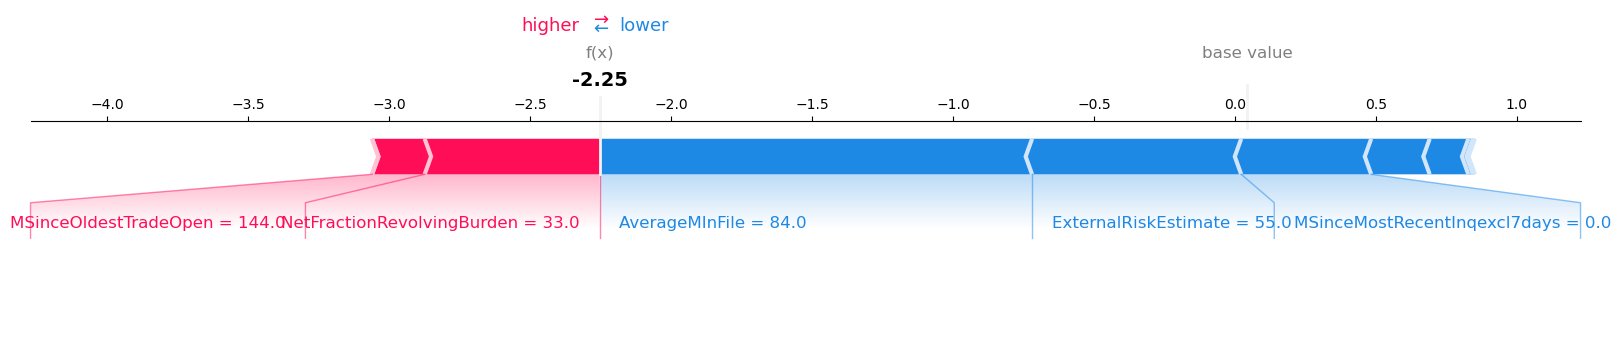

In [4]:
# Se carga el modelo y el pipeline
with open("final_model/model", "rb") as fh:
    xgb: XGBClassifier = pickle.load(fh)

with open("final_model/pipeline", "rb") as fh:
    pipeline: PipelineCV = pickle.load(fh)

# Se leen los datos
data = pd.read_csv(new_data_path, sep=sep)
X_data = data[pipeline.inputs]
X = pipeline.transform(X_data)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer(X_data)
print("Predictions:", xgb.predict(X))
# visualize the first prediction's explanation
shap.plots.force(shap_values[0], matplotlib=True)
# plt.savefig("gg.png",dpi=150, bbox_inches='tight')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


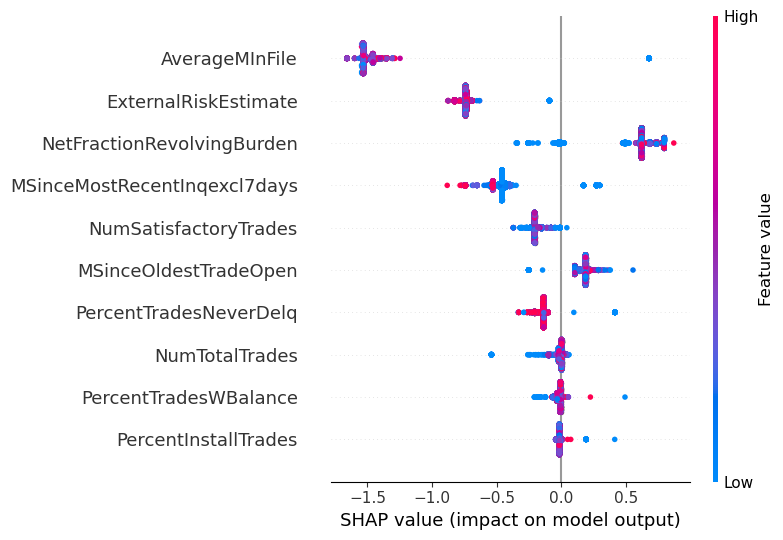

In [5]:
shap.summary_plot(shap_values, X_data)